#### Initially we need to first import the basic libraries and import the data frame.
#### Shapash willbe connected after we fit the training data to the model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/varun/Desktop/My Files/Education/Data_Files/Admission_Predict.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


<AxesSubplot:>

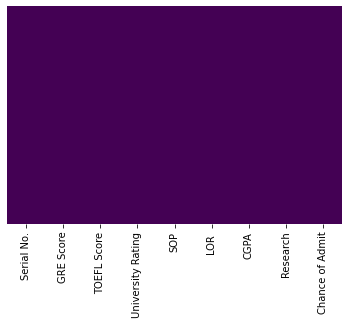

In [3]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [4]:
x = df.iloc[:,[1,2,3,4,5,6,7]]
y = df['Chance of Admit']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 32)

In [7]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler

In [8]:
regressor = RandomForestRegressor(n_estimators = 200).fit(x_train,y_train)

In [9]:
y_pred = pd.DataFrame(regressor.predict(x_test), columns=['pred'], index=x_test.index)

#### Shapash will come in to picture now

#### This is the main library which builds the local webpage to display all the EDA

In [10]:
from shapash.explainer.smart_explainer import SmartExplainer

In [11]:
xpl = SmartExplainer()
xpl.compile(x = x_test,
           model = regressor,
           y_pred=y_pred)

Backend: Shap TreeExplainer


In [12]:
xpl

#### If we don't want to distribute the data W.R.T maximum contributing features, no need to mention the max_contrib option

In [13]:
# app = xpl.run_app(title_story = 'Admissions Predict')

In [14]:
xpl.to_pandas(max_contrib=3).head(10) # max_contrib means it will display the top 3 features
app1 = xpl.run_app(title_story = 'Max Contrib')

/opt/anaconda3/envs/Conda_Ml/lib/python3.8/site-packages/pandas/core/frame.py:1485: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

INFO:root:Your Shapash application run on http://Varuns-MacBook-Air.local:8050/


Dash is running on http://0.0.0.0:8050/



INFO:root:Use the method .kill() to down your app.
INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app 'shapash.webapp.smart_app' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://192.168.43.220:8050/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [12/Jul/2021 12:11:49] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Jul/2021 12:11:49] "GET /assets/style.css?m=1626070235.8458648 HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [12/Jul/2021 12:11:49] "GET /assets/main.js?m=1626070235.843873 HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [12/Jul/2021 12:11:49] "GET /assets/material-icons.css?m=1626070235.8439984 HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [12/Jul/2021 12:11:49] "GET /assets/jquery.js?m=1626070235.8437386 HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [12/Jul/2021 12:11:49] "GET /assets/favicon.ico?m=1626070235.8431795 HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [12/Jul/2021 12:11:49] "GET /assets/shapash-fond-fonce.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [12/Jul/2021 12:11:49] "GET /assets/reload.png HTTP/1.1" 304 -
INFO:werkzeug:127.0.0.1 - - [12/Jul/2021 12:11:49] "GET /assets/settings.png HTTP/1.1" 304

In [15]:
predictor = xpl.to_smartprecitor()
predictor.save('/Users/varun/Desktop/My Files/Education/Shapash.pkl')

AttributeError: 'SmartExplainer' object has no attribute 'to_smartprecitor'